<hr/>

# Foundations of Reinforcement Learning

<hr/>

<h1><font color="darkblue">Lab 1: Intro to Python and two problems on probability</font></h1>



##  Content
1. Jupyter and Jupyterhub
2. Python basic
3. Library installation
4. Lab Problems

### 1. Jupyter and Jupyterhub
#### 1.1 Jupyter

Jupyter is an open-source web application that allows you to create and share documents that contain live code, equations, visualizations and narrative text, (see https://jupyter.org/). To naviagate through Jupyter devalopment environment, see [Notebook Basic](https://github.com/ipython/ipython-in-depth/blob/7e5ce96cc9251083979efdfc393425f1229a4a68/examples/Notebook/Notebook%20Basics.ipynb).

#### 1.2 Jupyterhub
You are currently viewing a Jupyter Notebook file running remotely on Jupyterhub of this class. Jupyterhub basically has the same features as Jupyter but saving and executing your code in the cloud. Therefore, you could avoid python & jupyter installation tasks and access relatively high computational power.

#### 1.3 [Optional] Install Jupyter on your computer
If you prefer to have Jupyter on your computer and run codes offline (e.g. you don't have a stable internet connection), try<br>
[Install Python](https://www.python.org/downloads/) <br>
[Install Anaconda](https://www.anaconda.com/distribution/#download-section)

### 2. Python basic
Python is the programming language we use for this course. If Python seems unfamiliar to you, [Python tutorial](https://cs231n.github.io/python-numpy-tutorial/) may give you a quick start.

### 3 Library Installation
You can add libraries to the Jupyter/Jupyterhub devalopment environment by the following steps:

#### Step 1. Call pip to install
Run the following code

In [ ]:
!pip install numpy
!pip install matplotlib

#### Step 2. Add system path (needed only for the first time you add library)
Run the following code

In [ ]:
import sys
sys.path.append('FILL IN the installed librarys file directory')
# If you don't know the file directory:
#   Run step 1 again you might see the file directory
#   For the course Jupyterhub it should be /home/**FILL IN YOUR USER NAME**/.local/lib/python3.6/site-packages

### 4. Lab Problems

In [ ]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
# import useful libraries
from scipy.stats import norm

### Problem 1

Given the following mixture of two Gaussians,

$\displaystyle \qquad f(x) = \frac{4}{5\sqrt{2\pi}} \exp\left(-\frac{x^2}{2}\right) + \frac{1}{10\sqrt{2\pi}} \exp\left(-\frac{(x-3)^2}{8}\right)$,


1. Plot the distribution function $f(x)$; (1 pts)
2. Calculate the mean and variance of the given mixture of two Gaussians; (2 pts)
0. Sample 1000000 values from the given mixture of two Gaussians; (3 pts)
0. Plot a distribution histogram of your sampled values. (3 pts)
0. Show the mean and variance of your sampled values. (1 pts)

Total of 10 points

### Soulution:
#### 1.

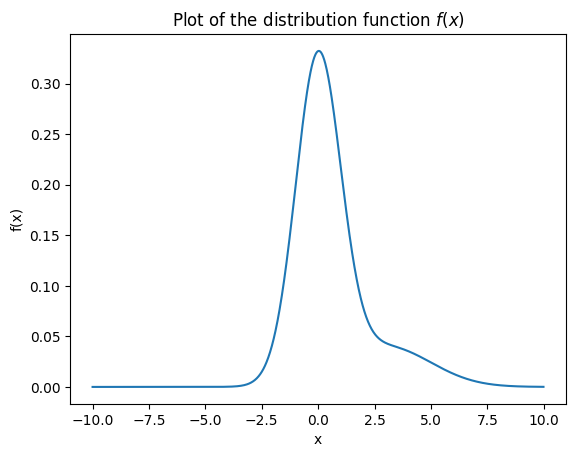

In [ ]:
#Define a function to return the PDF f(x) of mixture of two Gaussianas
def func_f(x):
  term_1 = (4/5)*(1/np.sqrt(2*np.pi)) * np.exp(-x**2/2)
  term_2 = (1/10)*(1/np.sqrt(2*np.pi)) * np.exp(-(x-3)**2/8)
  return term_1 + term_2

#Plot the PDF f(x) with x from -10 to 10
x = np.arange(-10, 10, 0.01)
fig, ax = plt.subplots()
ax.plot(x, func_f(x))
ax.set(xlabel='x', ylabel='f(x)', title='Plot of the distribution function $f(x)$')
plt.show()

#### 2.
We have $$f(x)=\alpha_1 f_1(x) + \alpha_2 f_2(x) = \alpha_1 \frac{1}{\sigma_1 \sqrt{2\pi}} \exp\left(\frac{-1}{2}\left(\frac{x-\mu_1}{\sigma_1}\right)^2\right) + \alpha_2 \frac{1}{\sigma_1 \sqrt{2\pi}} \exp\left(\frac{-1}{2}\left(\frac{x-\mu_2}{\sigma_2}\right)^2\right).$$
Since
\begin{align*}
\displaystyle \qquad f(x) &= \frac{4}{5\sqrt{2\pi}} \exp\left(-\frac{x^2}{2}\right) + \frac{1}{10\sqrt{2\pi}} \exp\left(-\frac{(x-3)^2}{8}\right)\\
&= \frac{4}{5} \frac{1}{1\sqrt{2\pi}} \exp\left(\frac{-1}{2}\left(\frac{x-0}{1}\right)^2\right) + \frac{1}{5} \frac{1}{2 \sqrt{2\pi}} \exp\left(\frac{-1}{2}\left(\frac{x-3}{2}\right)^2\right),
\end{align*}

we obtain $\alpha_1=\frac{4}{5}$, $\mu_1=0$, $\sigma_1=1$, $\alpha_2=\frac{1}{5}$, $\mu_2=3$, and $\sigma_2=2$.

Let $\mu$ and $\sigma^2$ be the mean and variance of the given mixture of two Gaussians, then we obtain
$$\mu=\alpha_1*\mu_1+\alpha_2*\mu_2=\frac{4}{5}*0+\frac{1}{5}*3=\frac{3}{5},$$
and
$$\sigma^2=\alpha_1*\left(\mu_1^2+\sigma_1^2\right)+\alpha_2*\left(\mu_2^2 + \sigma_2^2\right)-(\alpha_1*\mu_1+\alpha_2*\mu_2)^2 = \frac{4}{5} + \frac{1}{5}*\left(3^2+2^2\right)-(\frac{3}{5})^2=\frac{76}{25}.$$




#### 3.

In [ ]:
#Sampling 1000000 samples by using scipy and numpy libs
x = [norm(0, 1), norm(3, 2)]
draw = np.random.choice([0, 1], 1000000, p=[4/5, 1/5])
samples = [x[i].rvs() for i in draw]

#### 4.

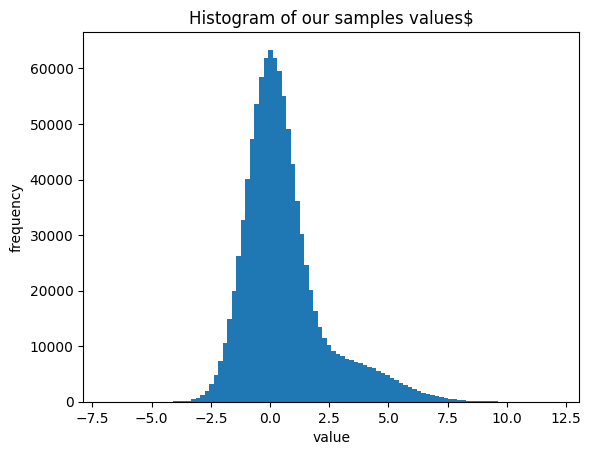

In [ ]:
#Plot the histogram of sampled values
fig, ax = plt.subplots()
ax.hist(samples, bins = 100)
ax.set(xlabel='value', ylabel='frequency', title='Histogram of our samples values$')
plt.show()

#### 5.

In [ ]:
#Print out the mean and variance of sampled values
print("Mean: " + str(np.mean(samples)))
print("Variance: " + str(np.var(samples)))

Mean: 0.5994285446734839
Variance: 3.039111424568618


### Problem 2 [Monty Hall Problem](https://en.wikipedia.org/wiki/Monty_Hall_problem)

#### "Suppose you're on a game show, and you're given the choice of three doors: Behind one door is a car; behind the others, goats. You pick a door, say No. 1, and the host, who knows what's behind the other doors, opens another door, say No. 3, which has a goat. He then says to you, 'Do you want to pick door No. 2?' Is it to your advantage to take the switch?"
Note that we assume the host knows which door the car is behind and will not reveal the location of the car until after the contestant has had the opportunity to switch doors. Say you get reward = 1 for winning the car and reward = 0 otherwise, run this game 1000 times and
1. Plot your average rewards at each time if you always switch; (5 pts)
2. Plot your average rewards at each time if you never switch. (5 pts)


Total of 10 points

#### 1.

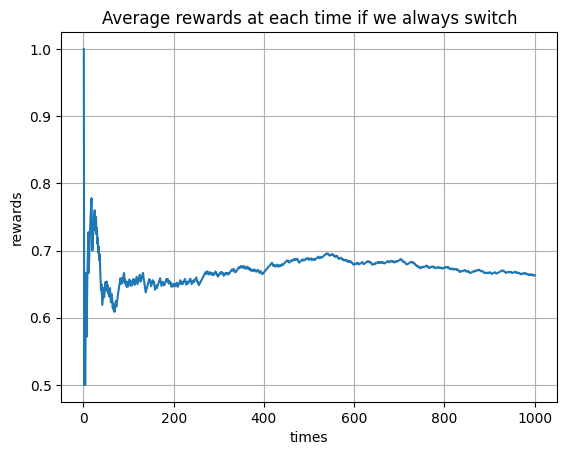

In [ ]:
#Define a function to return an binary array refects neither cars or goats per each element
def sample_doors():
  #Define an array array of doors with all goats
  doors = np.zeros(3)
  #Randomly set car into the doors array
  car_idx = np.random.randint(3)
  doors[car_idx] = 1
  return doors

#Arrays to store average rewards at each time for visualization
times, expected_rewards_by_time = [], []
#Total reward variable
total_reward = 0
for i in range(1000):
  doors = sample_doors()
  #Let player select the door NO.1
  player_select = 0
  host_select = -1
  #If the door NO.2 contains goats
  if doors[1] == 0:
    #Host select this door and player switch
    host_select = 1
    player_select = 2
  #If the door NO.3 contains goats
  else:
    #Host select this door and player switch
    host_select = 2
    player_select = 1
  if doors[player_select] == 1:
    total_reward += 1
  #Add average reward at time step i+1
  expected_rewards_by_time.append(total_reward/(i+1))
  times.append(i+1)

#Plot average rewards at each time
fig, ax = plt.subplots()
ax.plot(times, expected_rewards_by_time)
ax.set(xlabel='times', ylabel='rewards', title='Average rewards at each time if we always switch')
ax.grid()
plt.show()


#### 2.

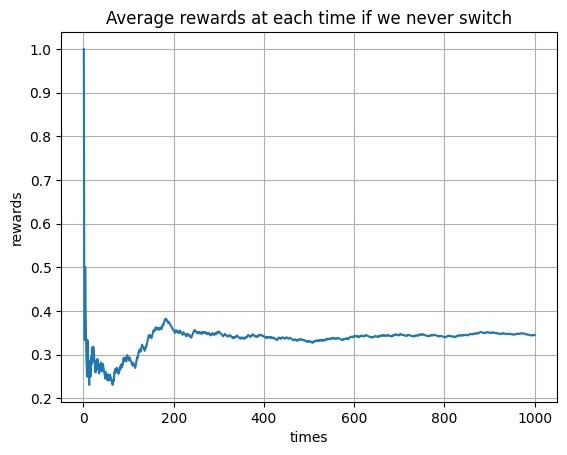

In [ ]:
#Arrays to store average rewards at each time for visualization
times, expected_rewards_by_time = [], []
#Total reward variable
total_reward = 0
for i in range(1000):
  doors = sample_doors()
  #Let player select the door NO.1
  player_select = 0
  host_select = -1
  #If the door NO.2 contains goats
  if doors[1] == 0:
    #Host select this door and player do not switch
    host_select = 1
    player_select = 0
  #If the door NO.3 contains goats
  else:
    #Host select this door and player do not switch
    host_select = 2
    player_select = 0
  if doors[player_select] == 1:
    total_reward += 1
  #Add average reward at time step i+1
  expected_rewards_by_time.append(total_reward/(i+1))
  times.append(i+1)

#Plot average rewards at each time
fig, ax = plt.subplots()
ax.plot(times, expected_rewards_by_time)
ax.set(xlabel='times', ylabel='rewards', title='Average rewards at each time if we never switch')
ax.grid()
plt.show()